<h1>My filterbank files</h1>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.reshape(np.fromfile('326/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T

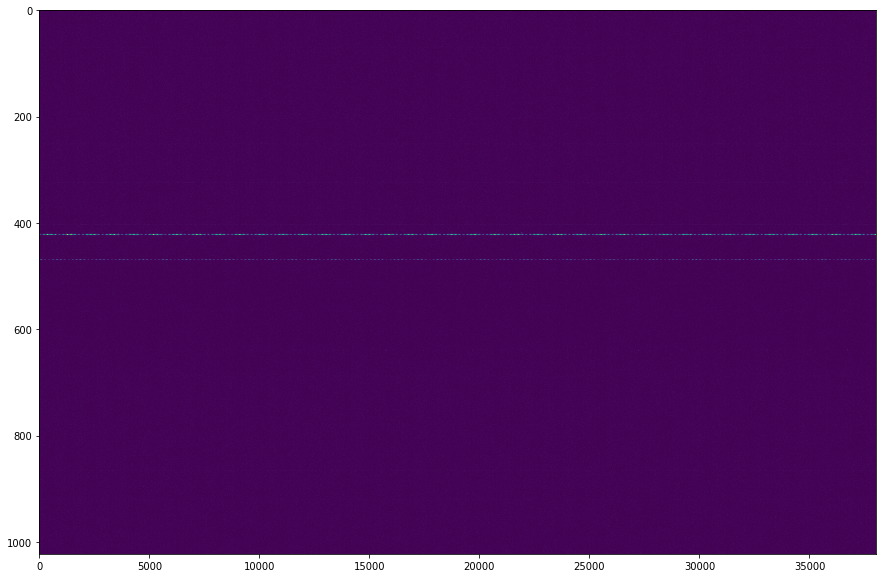

In [3]:
fig = plt.figure(figsize=(15,10))

plt.imshow(data[1:, 1024:], aspect='auto')

In [4]:
bandpass = np.sum(data[1:, :], axis=1)

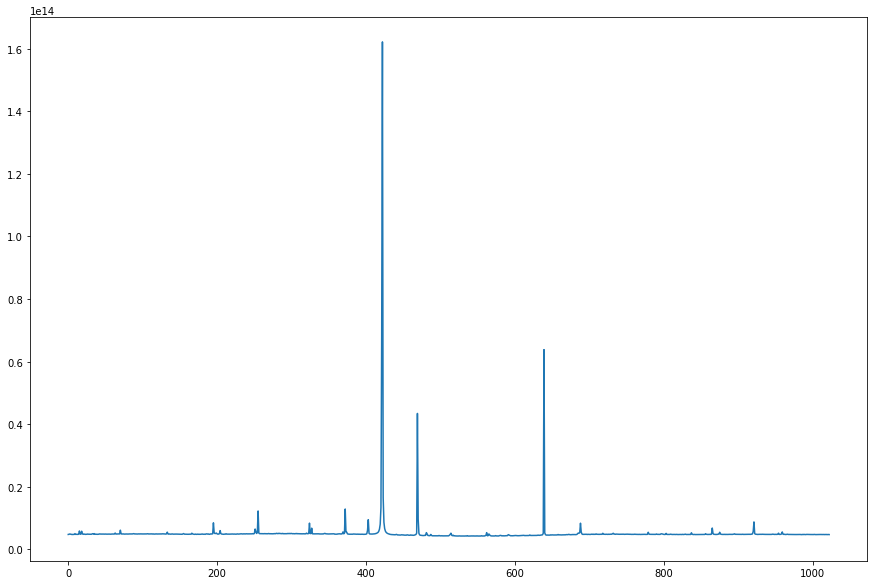

In [5]:
fig = plt.figure(figsize=(15,10))

plt.plot(bandpass)

In [6]:
data310 = np.reshape(np.fromfile('310/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data326 = np.reshape(np.fromfile('326/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data342 = np.reshape(np.fromfile('342/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data358 = np.reshape(np.fromfile('358/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T

Text(0.5,1,'358')

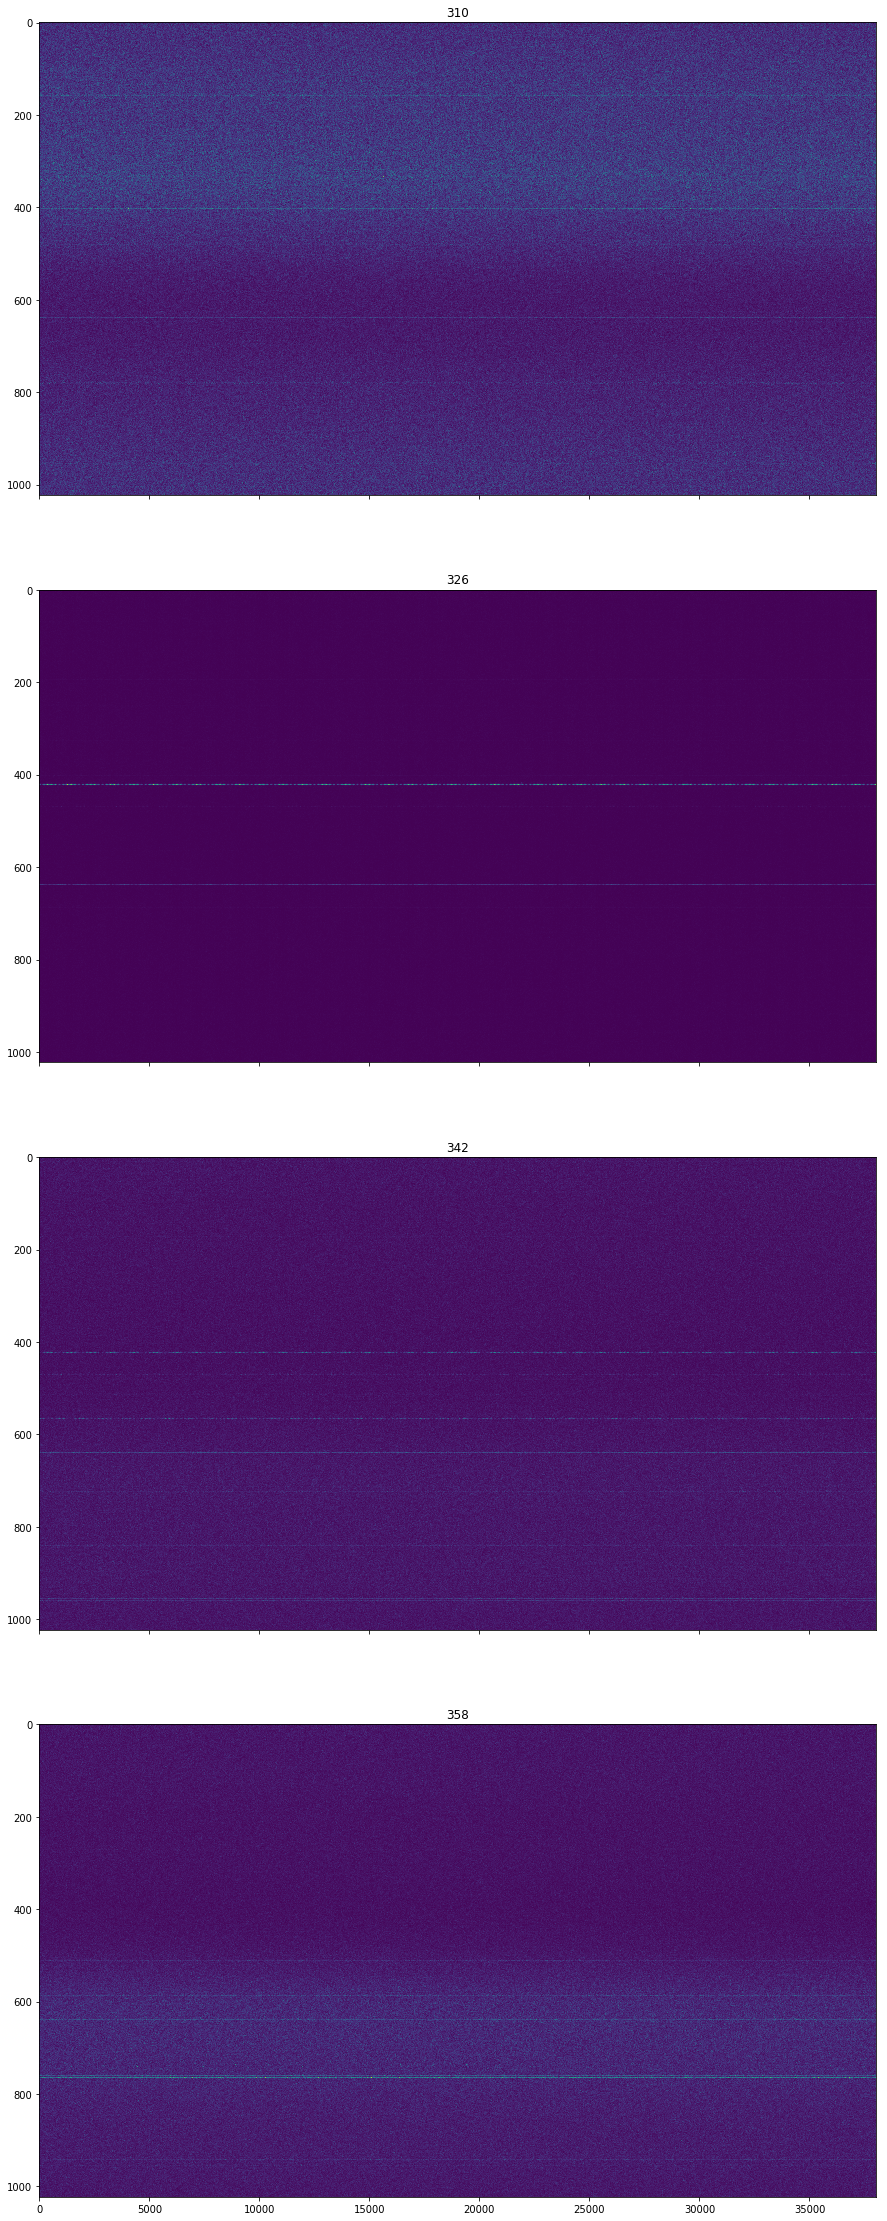

In [7]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].imshow(data310[1:, 1024:], aspect='auto')
axis[0].set_title('310')
axis[1].imshow(data326[1:, 1024:], aspect='auto')
axis[1].set_title('326')
axis[2].imshow(data342[1:, 1024:], aspect='auto')
axis[2].set_title('342')
axis[3].imshow(data358[1:, 1024:], aspect='auto')
axis[3].set_title('358')

In [46]:
bandpass310 = np.sum(data310[0:, :], axis=1)
bandpass326 = np.sum(data326[0:, :], axis=1)
bandpass342 = np.sum(data342[0:, :], axis=1)
bandpass358 = np.sum(data358[0:, :], axis=1)

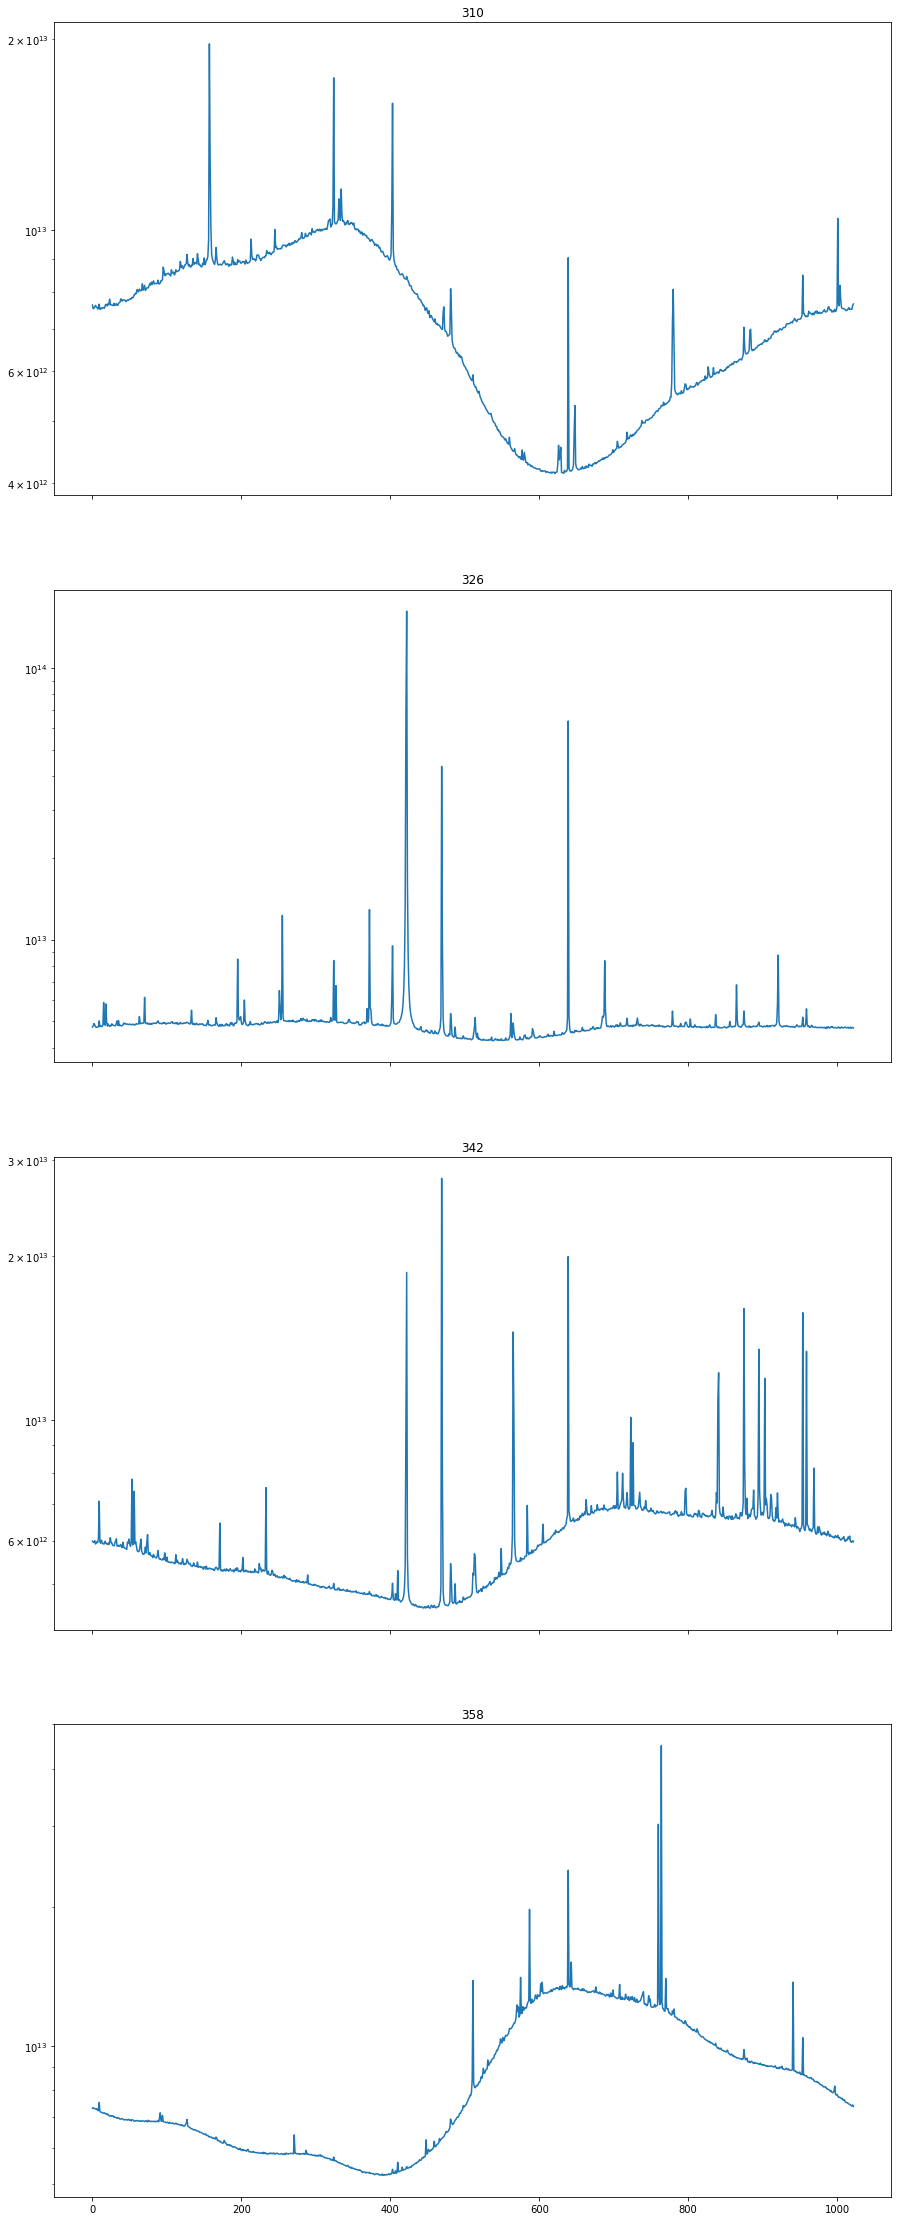

In [9]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310)
axis[0].set_title('310')
axis[0].set_yscale('log')
axis[1].plot(bandpass326)
axis[1].set_title('326')
axis[1].set_yscale('log')
axis[2].plot(bandpass342)
axis[2].set_title('342')
axis[2].set_yscale('log')
axis[3].plot(bandpass358)
axis[3].set_title('358')
axis[3].set_yscale('log')

In [10]:
fullbandpass = np.concatenate((bandpass310, bandpass326, bandpass342, bandpass358))
fullbandpass.shape

(4092,)

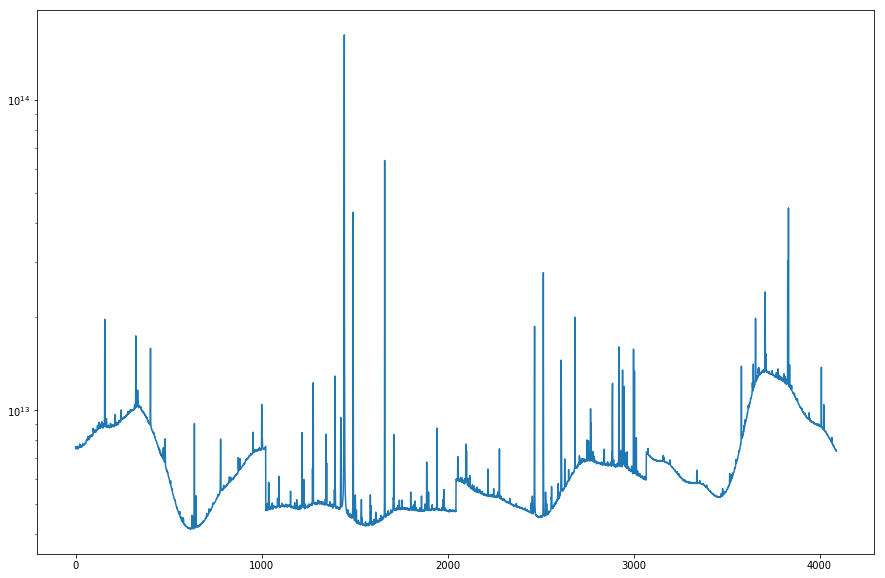

In [11]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullbandpass)
ax.set_yscale('log')

In [40]:
diff310326 = bandpass310[1022] - bandpass326[0]
diff326342 = bandpass326[1022] - bandpass342[0]
diff342358 = bandpass342[1022] - bandpass358[0]

norm310 = np.copy(bandpass310)
norm326 = np.copy(bandpass326) + diff310326
norm342 = np.copy(bandpass342) + diff326342 + diff310326
norm358 = np.copy(bandpass358) + diff342358 + diff326342 + diff310326

fullnorm = np.concatenate((norm310, norm326, norm342, norm358))
fullnorm.shape

(4092,)

Text(0.5,1,'Non-swapped halves')

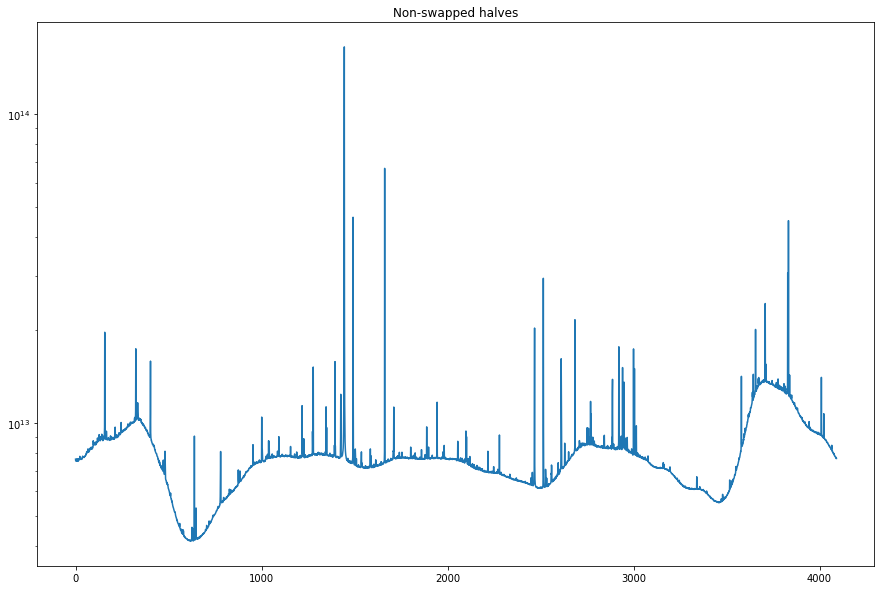

In [42]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullnorm)
#ax.plot(fullbandpass, 'r')
ax.set_yscale('log')
ax.set_title('Non-swapped halves')

In [12]:
time310 = np.sum(data310[1:, :], axis=0)
time326 = np.sum(data326[1:, :], axis=0)
time342 = np.sum(data342[1:, :], axis=0)
time358 = np.sum(data358[1:, :], axis=0)

Text(0.5,1,'358')

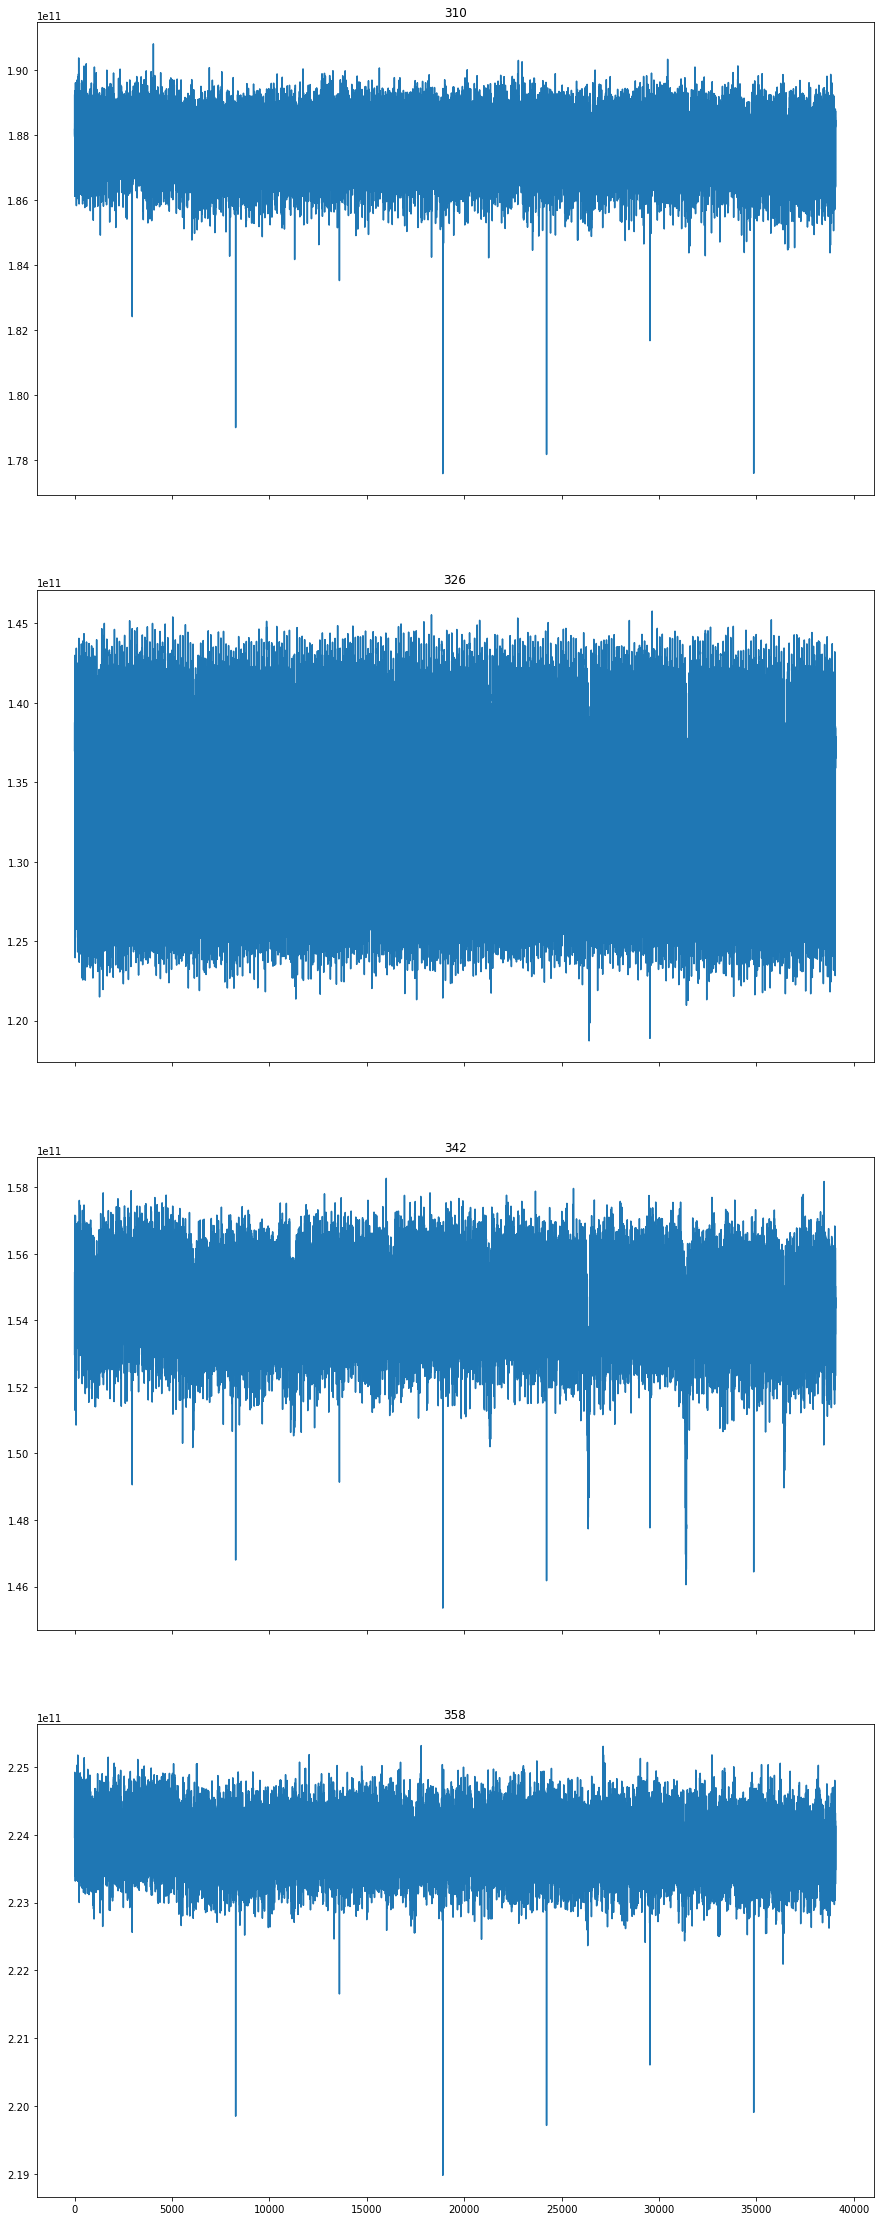

In [13]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(time310)
axis[0].set_title('310')
axis[1].plot(time326)
axis[1].set_title('326')
axis[2].plot(time342)
axis[2].set_title('342')
axis[3].plot(time358)
axis[3].set_title('358')

In [14]:
bandpass310swapped = np.copy(bandpass310)
bandpass310swapped[512:] = np.copy(bandpass310[0:511])
bandpass310swapped[0:511] = bandpass310[512:]
bandpass326swapped = np.copy(bandpass326)
bandpass326swapped[512:] = np.copy(bandpass326[0:511])
bandpass326swapped[0:511] = bandpass326[512:]
bandpass342swapped = np.copy(bandpass342)
bandpass342swapped[512:] = np.copy(bandpass342[0:511])
bandpass342swapped[0:511] = bandpass342[512:]
bandpass358swapped = np.copy(bandpass358)
bandpass358swapped[512:] = np.copy(bandpass358[0:511])
bandpass358swapped[0:511] = bandpass358[512:]
fullbandswapped = np.concatenate((bandpass310swapped, bandpass326swapped, bandpass342swapped, bandpass358swapped))
fullbandswapped.shape

(4092,)

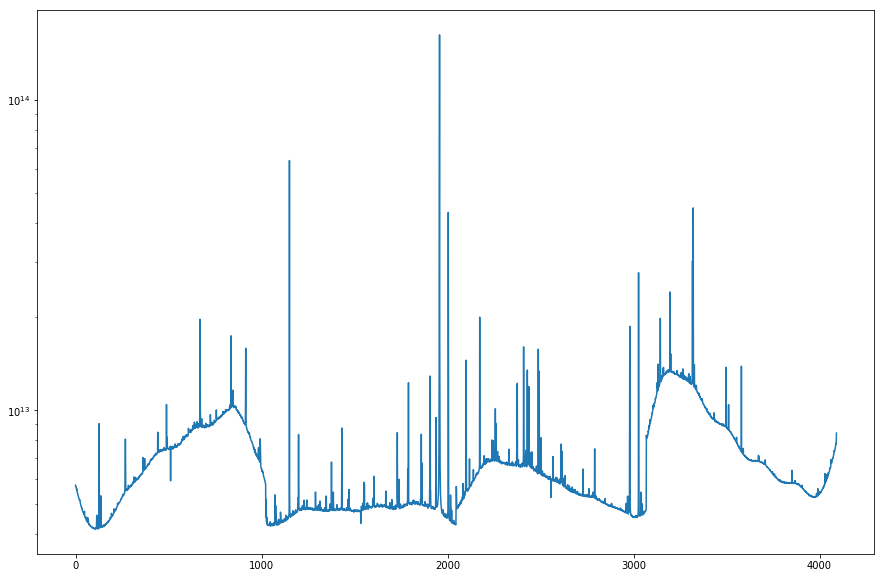

In [15]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullbandswapped)
#ax.plot(fullbandpass, 'r')
ax.set_yscale('log')

In [44]:
diff310326 = bandpass310swapped[1022] - bandpass326swapped[0]
diff326342 = bandpass326swapped[1022] - bandpass342swapped[0]
diff342358 = bandpass342swapped[1022] - bandpass358swapped[0]

norm310 = np.copy(bandpass310swapped)
norm326 = np.copy(bandpass326swapped) + diff310326
norm342 = np.copy(bandpass342swapped) + diff326342 + diff310326
norm358 = np.copy(bandpass358swapped) + diff342358 + diff326342 + diff310326

fullnorm = np.concatenate((norm310, norm326, norm342, norm358))
fullnorm.shape

(4092,)

Text(0.5,1,'Swapped halves')

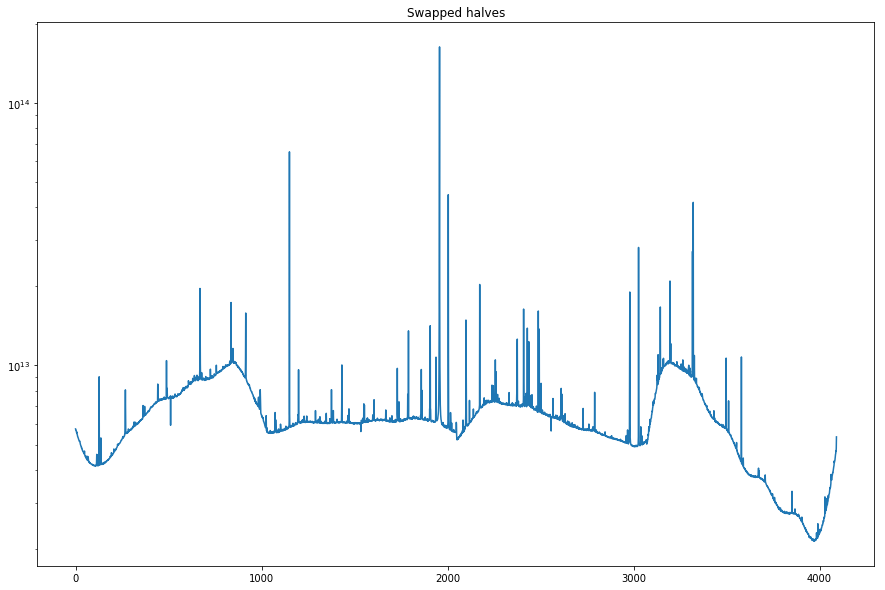

In [45]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullnorm)
ax.set_yscale('log')
ax.set_title('Swapped halves')

In [16]:
tryarray = np.arange(8)
tryarray[0:2] = 0
print(tryarray)
np.flip(tryarray, axis=0)

[0 0 2 3 4 5 6 7]


array([7, 6, 5, 4, 3, 2, 0, 0])

<h1>Swapped bands</h1>

In [58]:
bandpass310 = np.sum(data310[0:, :], axis=1)
bandpass326 = np.sum(data326[0:, :], axis=1)
bandpass342 = np.sum(data342[0:, :], axis=1)
bandpass358 = np.sum(data358[0:, :], axis=1)

In [78]:
bandpass310swapped = np.ones((1024))
bandpass310swapped[0:512] = bandpass310[512:]
bandpass310swapped[512:] = bandpass310[0:512]
bandpass310swapped[512] = (bandpass310swapped[510] + bandpass310swapped[511] + bandpass310swapped[513] + bandpass310swapped[514]) / 4.0

bandpass326swapped = np.ones((1024))
bandpass326swapped[0:512] = bandpass326[512:]
bandpass326swapped[512:] = bandpass326[0:512]
bandpass326swapped[512] = (bandpass326swapped[510] + bandpass326swapped[511] + bandpass326swapped[513] + bandpass326swapped[514]) / 4.0


bandpass342swapped = np.ones((1024))
bandpass342swapped[0:512] = bandpass342[512:]
bandpass342swapped[512:] = bandpass342[0:512]
bandpass342swapped[512] = (bandpass342swapped[510] + bandpass342swapped[511] + bandpass342swapped[513] + bandpass342swapped[514]) / 4.0


bandpass358swapped = np.ones((1024))
bandpass358swapped[0:512] = bandpass358[512:]
bandpass358swapped[512:] = bandpass358[0:512]
bandpass358swapped[512] = (bandpass358swapped[510] + bandpass358swapped[511] + bandpass358swapped[513] + bandpass358swapped[514]) / 4.0


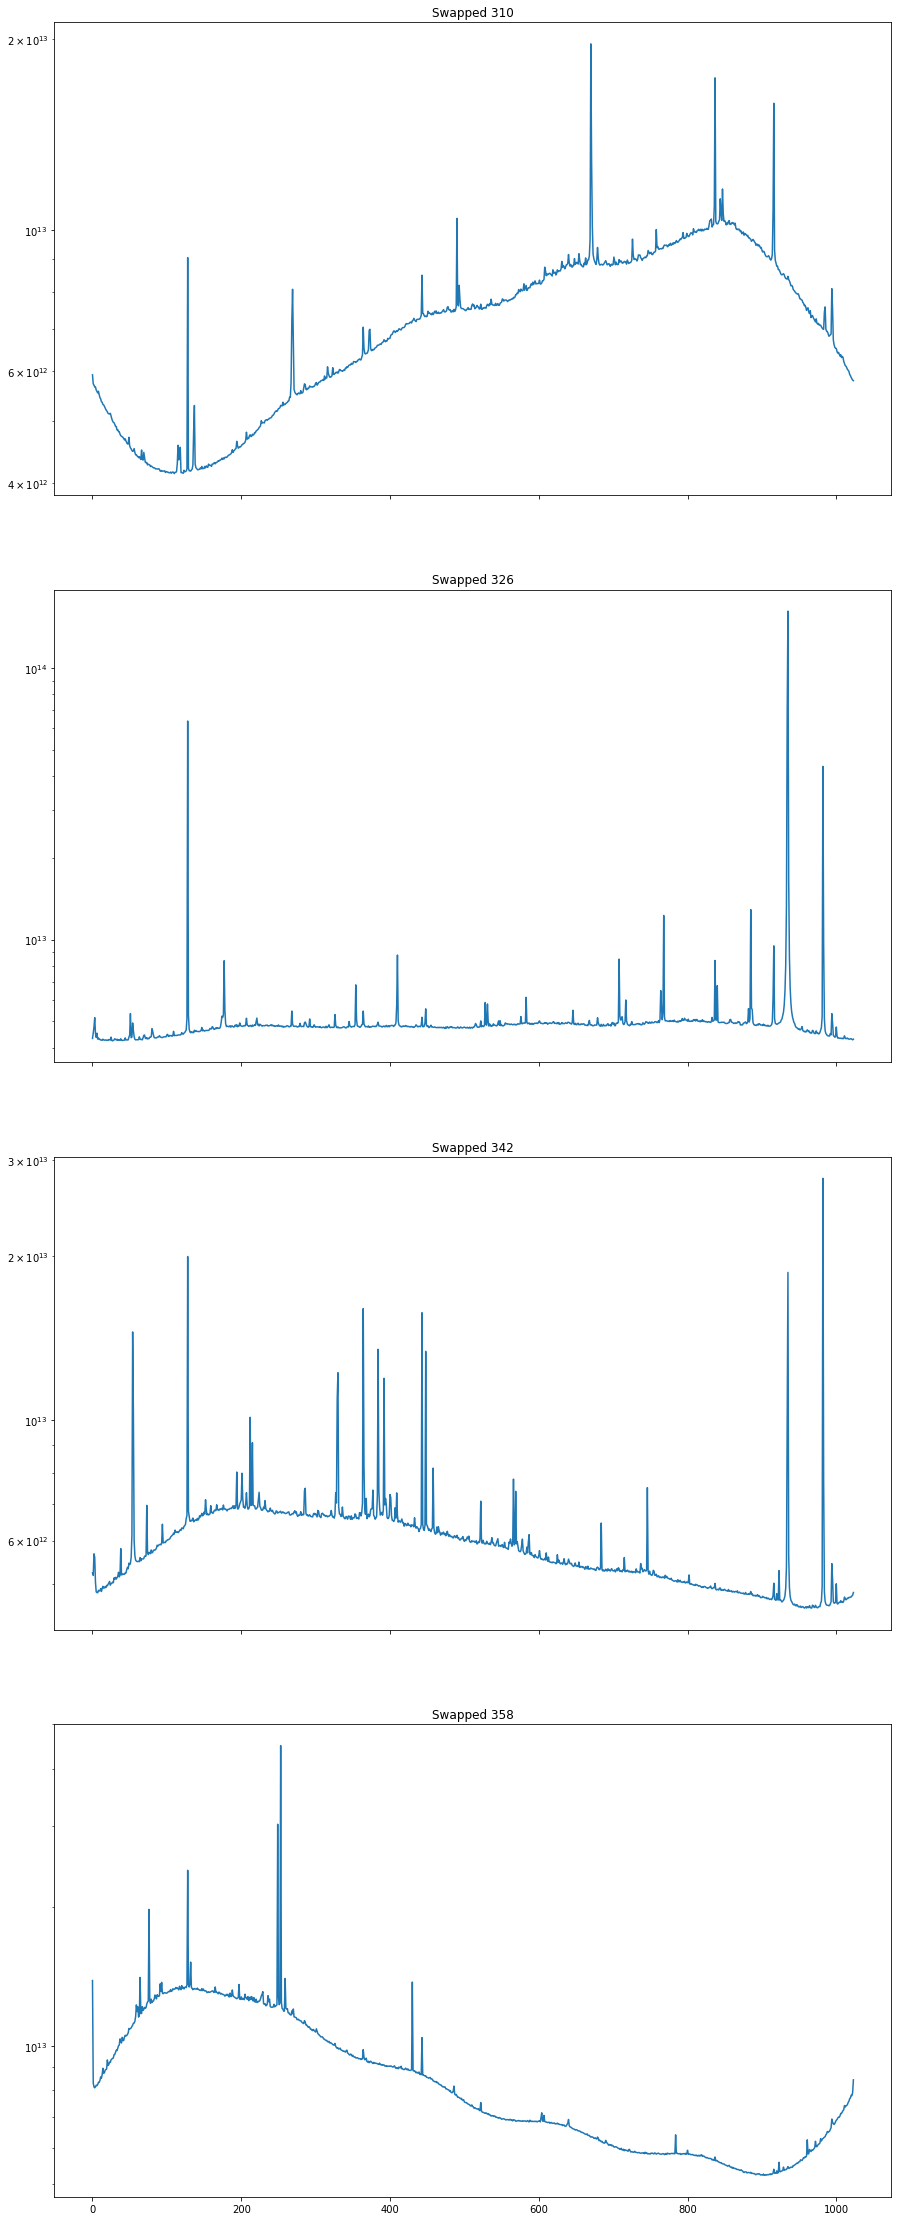

In [79]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310swapped)
axis[0].set_title('Swapped 310')
axis[0].set_yscale('log')
axis[1].plot(bandpass326swapped)
axis[1].set_title('Swapped 326')
axis[1].set_yscale('log')
axis[2].plot(bandpass342swapped)
axis[2].set_title('Swapped 342')
axis[2].set_yscale('log')
axis[3].plot(bandpass358swapped)
axis[3].set_title('Swapped 358')
axis[3].set_yscale('log')

In [80]:
fullbandswapped = np.concatenate((bandpass310swapped, bandpass326swapped, bandpass342swapped, bandpass358swapped))

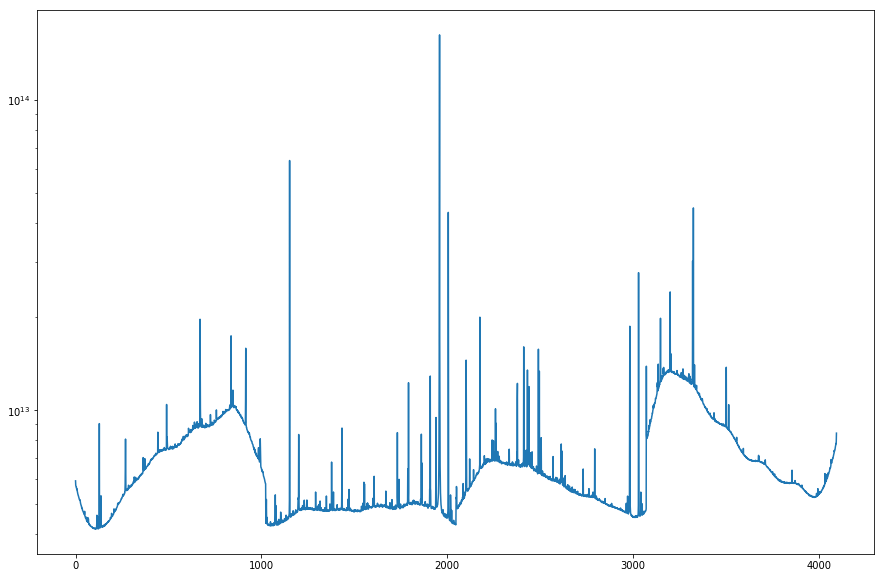

In [81]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(fullbandswapped)
ax.set_yscale('log')

In [103]:
from statsmodels import robust

In [115]:
bandpass310median = np.median(bandpass310swapped)
bandpass310std = np.std(bandpass310swapped)
bandpass310mad = robust.mad(bandpass310swapped)

print(bandpass310std)
print(bandpass310mad)

#limit310 = bandpass310median + 5.0 * bandpass310std
limit310 = bandpass310median + 5.0 * bandpass310mad

bandpass310swappedclipped = np.copy(bandpass310swapped)
bandpass310swappedclipped[bandpass310swappedclipped > limit310] = limit310

bandpass326median = np.median(bandpass326swapped)
bandpass326std = np.std(bandpass326swapped)
bandpass326mad = robust.mad(bandpass326swapped)

print(bandpass326std)
print(bandpass326mad)

#limit326 = bandpass326median + 5.0 * bandpass326std
limit326 = bandpass326median + 5.0 * bandpass326mad

bandpass326swappedclipped = np.copy(bandpass326swapped)
bandpass326swappedclipped[bandpass326swappedclipped > limit326] = limit326

bandpass342median = np.median(bandpass342swapped)
bandpass342std = np.std(bandpass342swapped)
bandpass342mad = robust.mad(bandpass342swapped)

print(bandpass342std)
print(bandpass342mad)

#limit342 = bandpass342median + 5.0 * bandpass342std
limit342 = bandpass342median + 5.0 * bandpass342mad

bandpass342swappedclipped = np.copy(bandpass342swapped)
bandpass342swappedclipped[bandpass342swappedclipped > limit342] = limit342

bandpass358median = np.median(bandpass358swapped)
bandpass358std = np.std(bandpass358swapped)
bandpass358mad = robust.mad(bandpass358swapped)

print(bandpass358std)
print(bandpass358mad)

#limit358 = bandpass358median + 5.0 * bandpass358std
limit358 = bandpass358median + 5.0 * bandpass358mad

bandpass358swappedclipped = np.copy(bandpass358swapped)
bandpass358swappedclipped[bandpass358swappedclipped > limit358] = limit358

1987246938677.3918
2359534730817.3896
5778276873291.545
143280488072.5101
1420540973322.0789
1158066020764.4734
3064481335942.497
2544148318833.8135


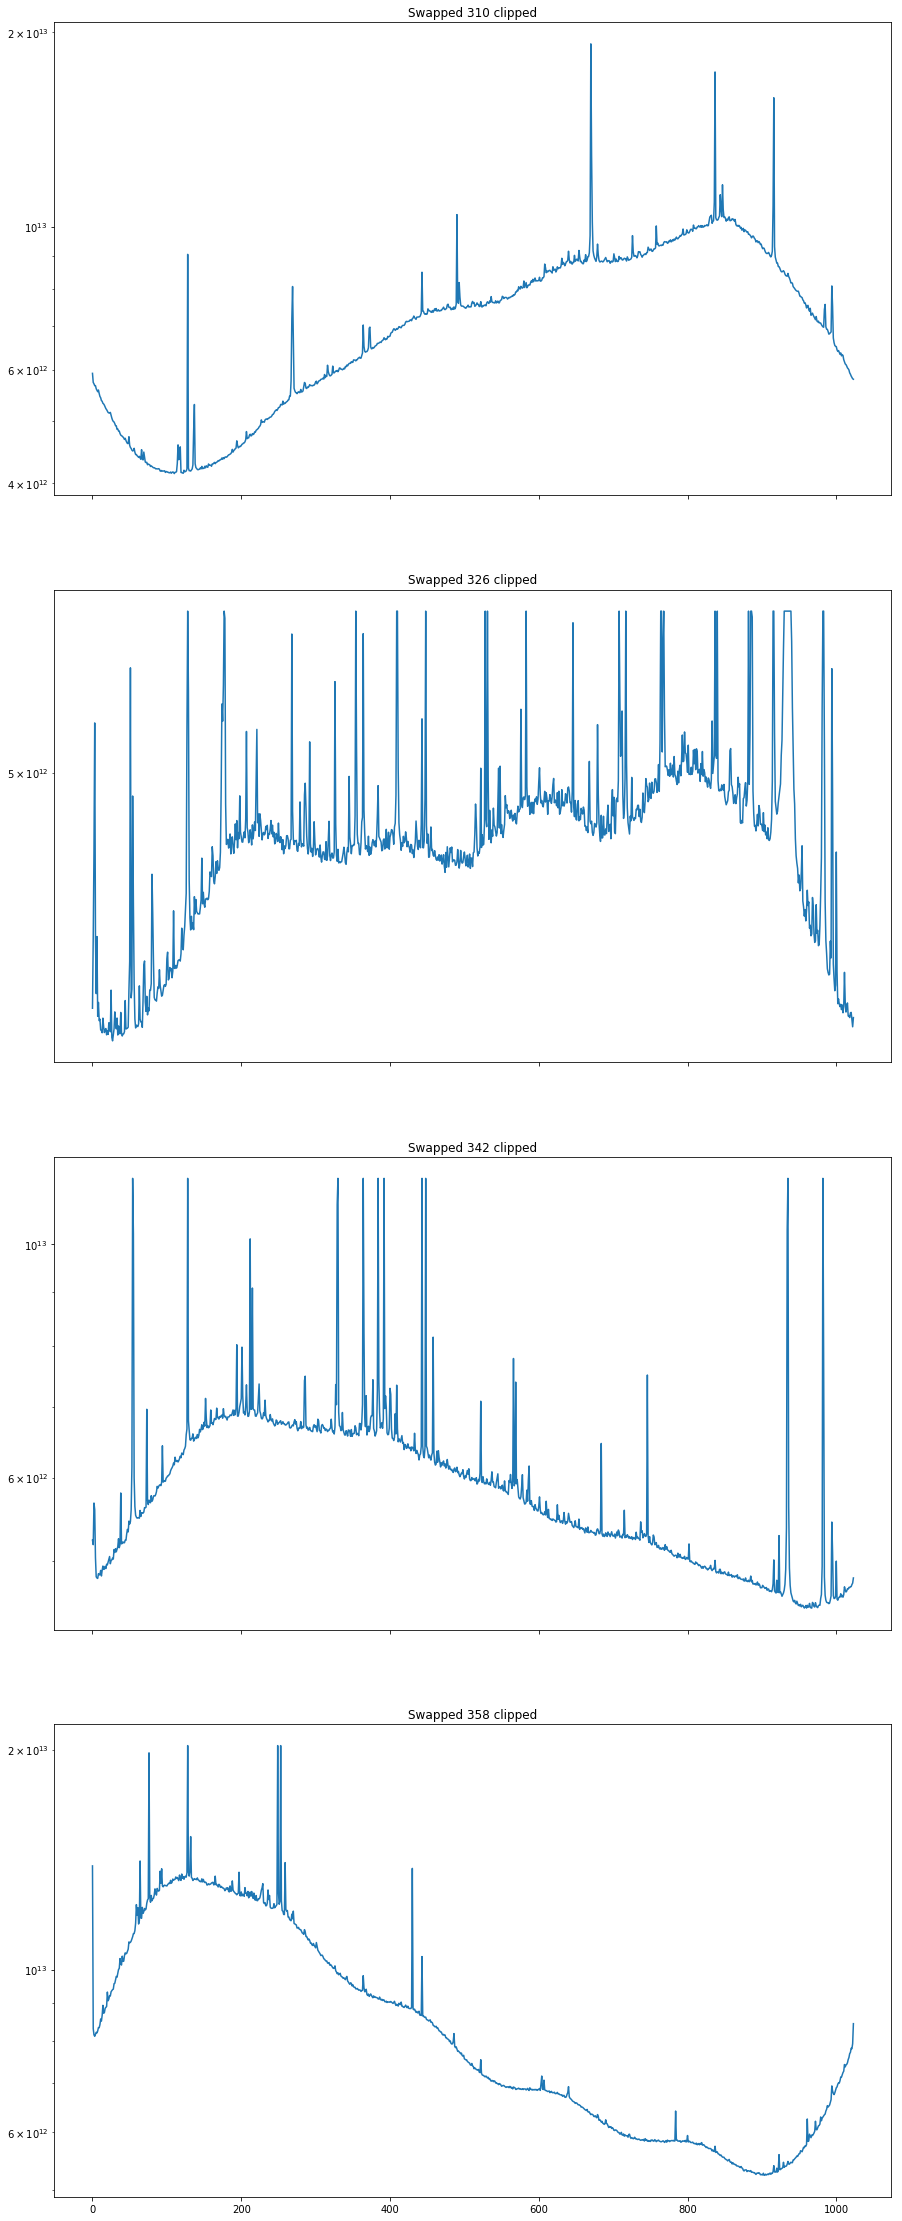

In [116]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310swappedclipped)
axis[0].set_title('Swapped 310 clipped')
axis[0].set_yscale('log')
axis[1].plot(bandpass326swappedclipped)
axis[1].set_title('Swapped 326 clipped')
axis[1].set_yscale('log')
axis[2].plot(bandpass342swappedclipped)
axis[2].set_title('Swapped 342 clipped')
axis[2].set_yscale('log')
axis[3].plot(bandpass358swappedclipped)
axis[3].set_title('Swapped 358 clipped')
axis[3].set_yscale('log')

In [117]:
fullbandswappedclipped = np.concatenate((bandpass310swappedclipped, bandpass326swappedclipped, bandpass342swappedclipped, bandpass358swappedclipped))

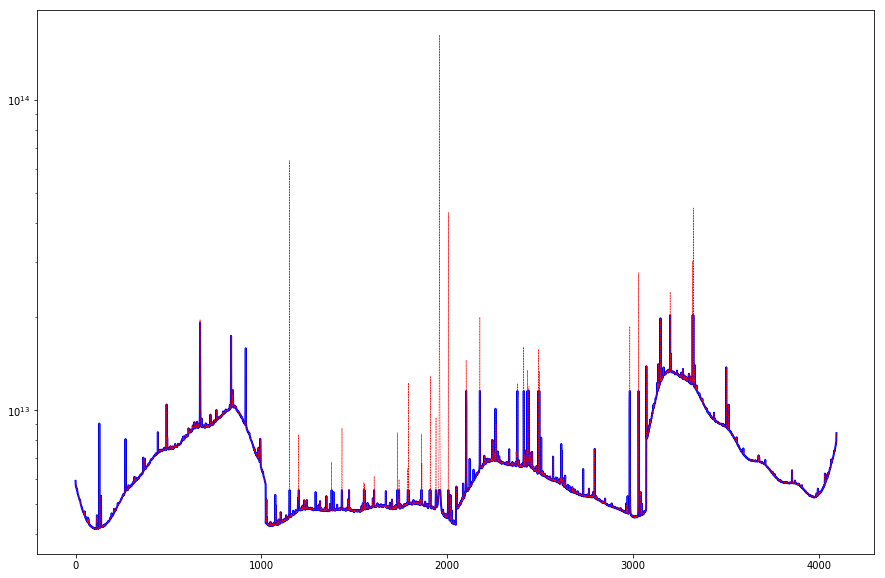

In [118]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(fullbandswappedclipped, 'b', linewidth=2.0)
ax.plot(fullbandswapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

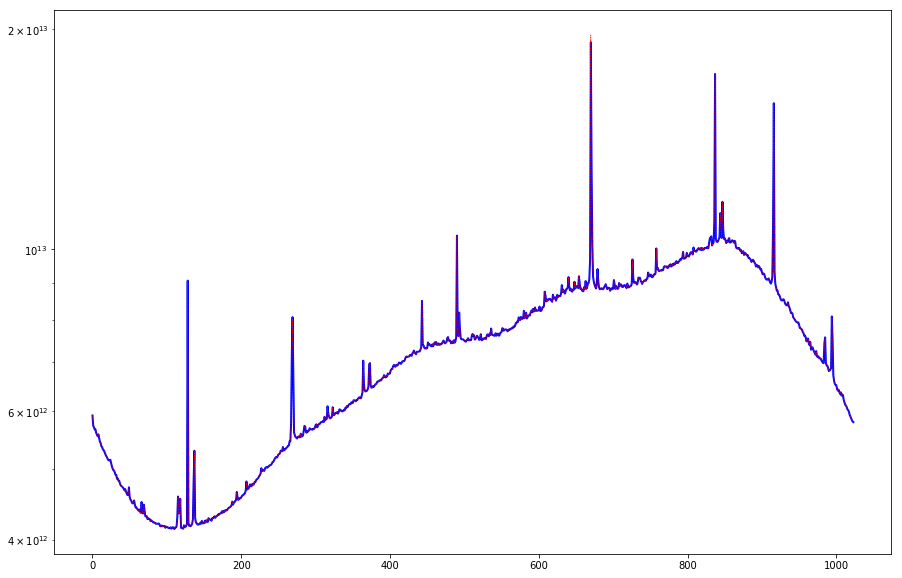

In [119]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(bandpass310swappedclipped, 'b', linewidth=2.0)
ax.plot(bandpass310swapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

In [142]:
conv310tmp = np.convolve(bandpass310swapped, np.ones(32), 'valid') / 32
print(conv310tmp.shape)
conv310 = np.ones((1024))
conv310[16:1009] = conv310tmp
conv310[0:16] = conv310[16]
conv310[1009:] = conv310[1008]

(993,)


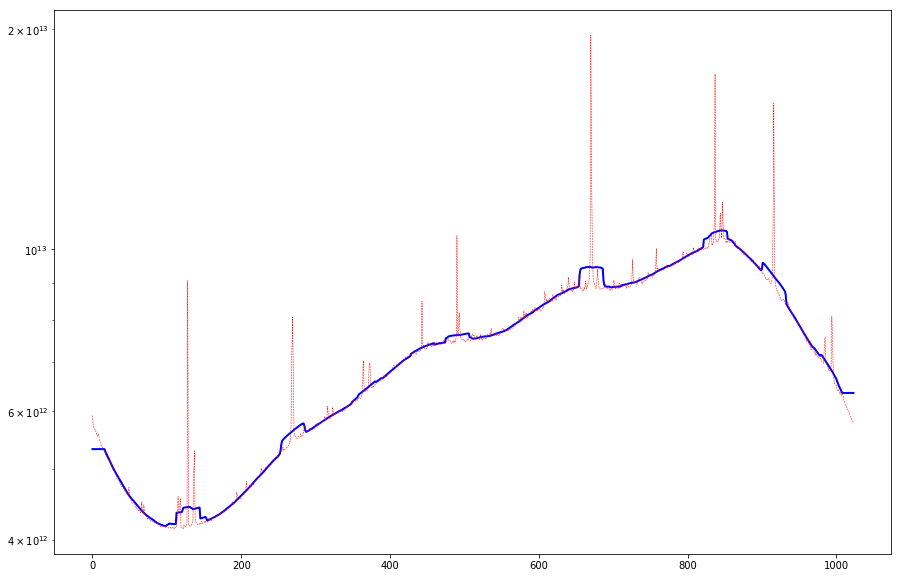

In [143]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(conv310, 'b', linewidth=2.0)
ax.plot(bandpass310swapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

In [144]:
norm310 = bandpass310swapped - conv310

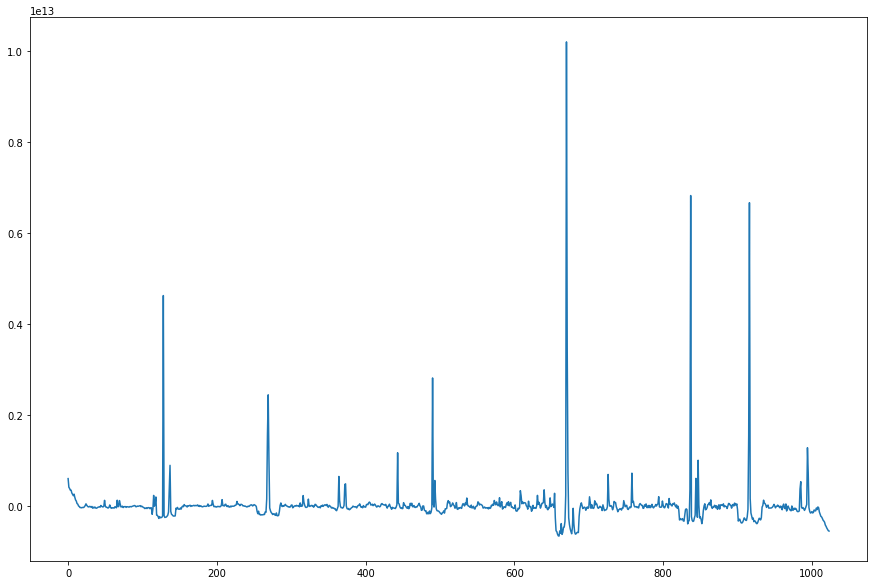

In [146]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(norm310)
#ax.set_yscale('log')

<h1>'Original' filterbank files</h1>

In [17]:
orig310 = np.reshape(np.loadtxt('310/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig326 = np.reshape(np.loadtxt('326/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig342 = np.reshape(np.loadtxt('342/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig358 = np.reshape(np.loadtxt('358/2019-01-30-10:09:17.dat'), (-1, 1024)).T

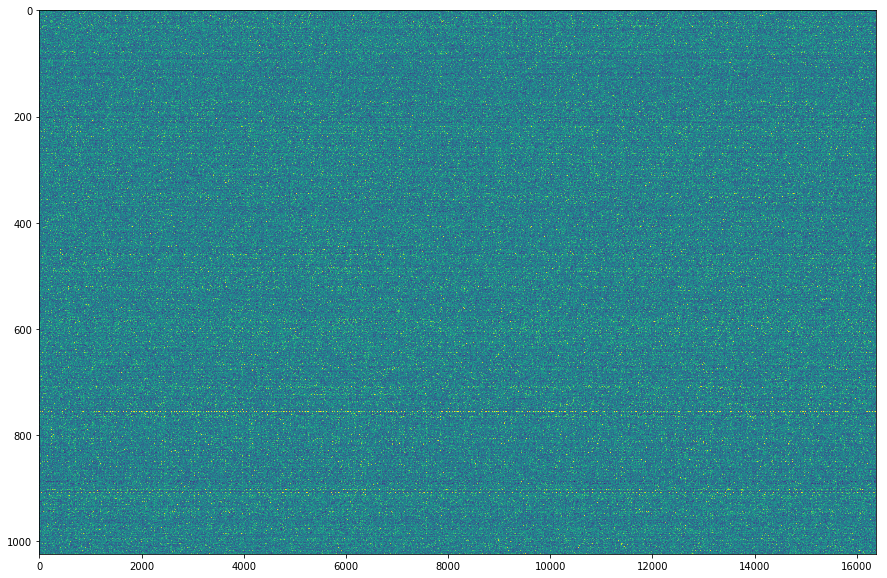

In [18]:
fig = plt.figure(figsize=(15,10))

plt.imshow(orig310, aspect='auto')

In [19]:
origband310 = np.sum(orig310, axis=1) / orig310.shape[1]
origband326 = np.sum(orig326, axis=1) / orig326.shape[1]
origband342 = np.sum(orig342, axis=1) / orig342.shape[1]
origband358 = np.sum(orig358, axis=1) / orig358.shape[1]

print(orig310.shape[1])

origbandfull = np.concatenate((origband310, origband326, origband342, origband358))

16384


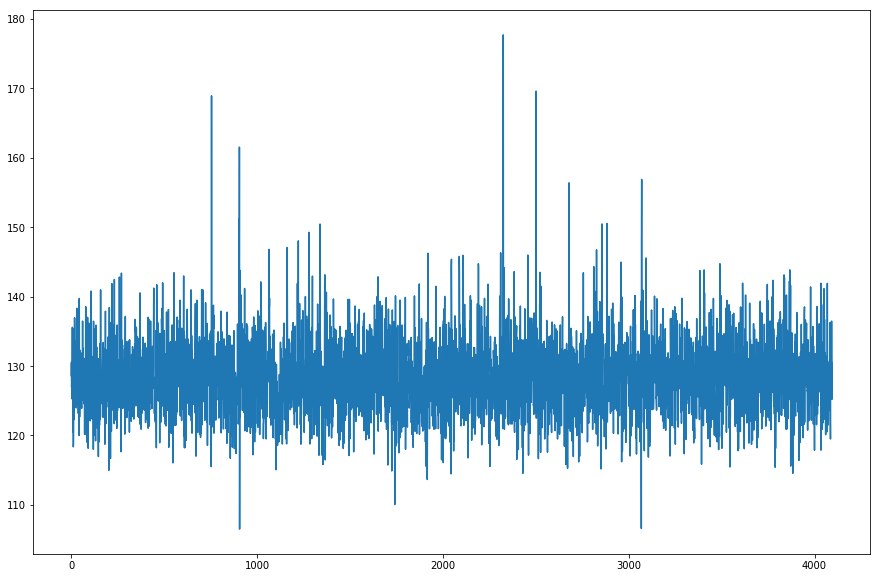

In [20]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(origbandfull)

In [21]:
for x in np.arange(16):
    print(orig310[x])

[129. 161. 130. ... 173. 210. 111.]
[106. 158. 108. ... 144. 127.  77.]
[142. 146. 117. ... 147. 102. 116.]
[115. 148. 126. ... 114. 111. 160.]
[128. 128. 172. ...  93. 127.  99.]
[111. 103.  84. ... 145. 112. 116.]
[143. 125. 119. ... 156. 108. 103.]
[ 98. 116. 141. ... 162. 142. 116.]
[109. 180. 109. ... 127. 111. 112.]
[134. 152. 147. ... 135. 135. 170.]
[136. 119. 148. ... 131. 116. 163.]
[144. 105. 107. ... 110. 111. 109.]
[129. 131. 130. ... 129. 115. 139.]
[114. 139. 110. ... 121. 126. 115.]
[146. 123. 134. ... 148. 111. 184.]
[140. 176.  82. ... 115.  87. 113.]
